In [1]:
import numpy as np
x_values = np.array([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
y_values = np.array([-1.42, -1.39, -1.55, -1.89, -2.43, -3.15, -4.05, -5.15, -6.43, -7.89])

In [2]:
# Punto 1) determinare i coefficienti di regressione lineare e i loro intervalli di confidenza al 95%. Si calcoli il coefficiente di determinazione
from scipy.stats import t

n = x_values.size
x_mean = np.mean(x_values)
y_mean = np.mean(y_values)

sigma_xy = (1/n) * np.sum((x_values - x_mean) * (y_values - y_mean))
sigma_quadro_x = (1/n) * np.sum((x_values - x_mean)**2)

b1 = sigma_xy / sigma_quadro_x
b0 = y_mean - (b1 * x_mean)
print ("b0:", round(b0, 2), ", b1:", round(b1, 2))

alpha = 0.05
T = t.ppf(1-alpha/2, n-2)
print ("Valore di T:", round(T, 2))

y_hat = b0 + (b1 * x_values)
r = y_values - y_hat
s_quadro = (1/(n-2)) * np.sum((r)**2)
s = np.sqrt(s_quadro)

infb0 = b0 - (s * T * np.sqrt((1/n) + ((x_mean**2) / (n * sigma_quadro_x))))
supb0 = b0 + (s * T * np.sqrt((1/n) + ((x_mean**2) / (n * sigma_quadro_x))))
print("Intervallo di b0: [", round(infb0, 2), ",", round(supb0, 2), "]")

infb1 = b1 - (T * (s / np.sqrt(sigma_quadro_x * n)))
supb1 = b1 + (T * (s / np.sqrt(sigma_quadro_x * n)))
print("Intervallo di b1: [", round(infb1, 2), ",", round(supb1, 2), "]")

test = t.ppf(alpha, n-2)
H1 = np.sqrt(n * sigma_quadro_x) * (b1 / s)

if H1 < test:
    print("L'ipotesi può essere rigettata")
else:
    print("L'ipotesi non può essere rigettata")

sigma_quadro_r = (1/n) * np.sum(r**2)
sigma_quadro_f = (sigma_xy **2) / sigma_quadro_x
sigma_quadro_y = sigma_quadro_f + sigma_quadro_r
R_quadro = 1 - (sigma_quadro_r / sigma_quadro_y)
print("Coefficiente di determinazione R²:", round(R_quadro, 2))

b0: 0.42 , b1: -2.88
Valore di T: 2.31
Intervallo di b0: [ -0.77 , 1.62 ]
Intervallo di b1: [ -3.65 , -2.11 ]
L'ipotesi può essere rigettata
Coefficiente di determinazione R²: 0.9


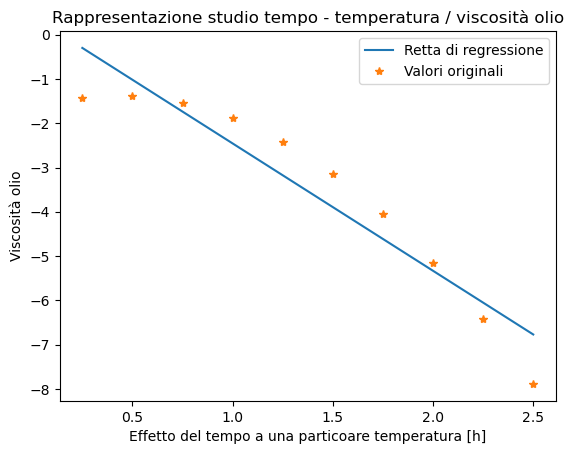

In [3]:
# Punto 2) Si rappresentino i dati e la retta di regressione nello stesso grafico
import matplotlib.pyplot as plt

x_graph = np.linspace (min(x_values), max(x_values), 1000)
y_graph = b0 + (b1 * x_graph)
plt.title("Rappresentazione studio tempo - temperatura / viscosità olio")
plt.plot(x_graph, y_graph, label = "Retta di regressione")
plt.plot(x_values, y_values, '*', label = "Valori originali")
plt.xlabel("Effetto del tempo a una particoare temperatura [h]")
plt.ylabel("Viscosità olio")
plt.legend()
plt.show()

In [4]:
# Punto 3) i determinino i coefficienti per un modello di regressione lineare del tipo y = a0 + a1x + a2x2 e si calcoli nuovamente il coefficiente di determinazione.
# Si pu`o affermare che il secondo modello si adatta meglio ai dati? Giustificare la risposta.

e = np.ones(n)
X = np.zeros((n, 3))
X[:, 0] = e
X[:, 1] = x_values
X[:, 2] = (x_values)**2

XX = np.linalg.pinv(X)
b = np.dot(XX, y_values)

y_hat2 = np.dot(X, b)
R_quadro2 = np.sum((y_hat2 - y_mean)**2) / np.sum((y_values - y_mean)**2)
print("Coefficiente di determinazione R²:", round(R_quadro2, 2))

Coefficiente di determinazione R²: 1.0


-1.6329999999999976 1.2321818181818154 -1.4945454545454526


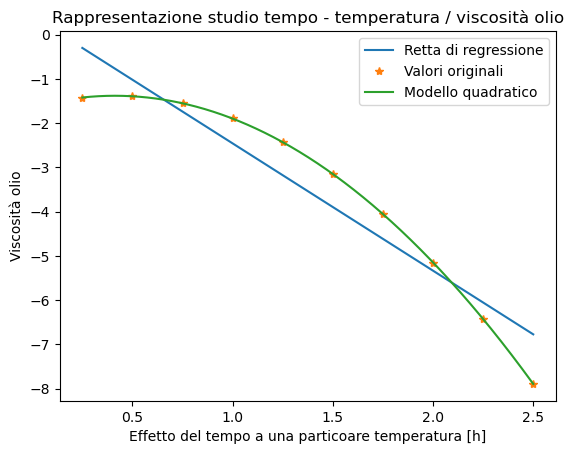

In [5]:
# Punto 4) Si rappresentino i dati, la retta di regressione e il modello quadratico in uno stesso grafico.
plt.title("Rappresentazione studio tempo - temperatura / viscosità olio")
plt.plot(x_graph, y_graph, label = "Retta di regressione")
plt.plot(x_values, y_values, '*', label = "Valori originali")
plt.xlabel("Effetto del tempo a una particoare temperatura [h]")
plt.ylabel("Viscosità olio")

x1_graph = np.linspace (min(x_values), max(x_values), 1000)
y1_graph = b[0] + (b[1] * x1_graph) + (b[2]* (x1_graph**2))
plt.plot(x1_graph, y1_graph, label = "Modello quadratico")

plt.legend()
plt.show()